In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import cross_val_score,train_test_split,RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import GridSearchCV, ParameterGrid
import time as time

import xgboost as xgb
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
def mase(actual, forecast):
    n = len(actual)
    numerator = np.mean(np.abs(actual - forecast))
    denominator = np.mean(np.abs(np.diff(actual)))
    return numerator / denominator

In [3]:
covid_df = pd.read_csv('cali_multi_df.csv', parse_dates=['Date'])
covid_df.drop(columns = ['PROVINCE_STATE_NAME'], inplace = True)
covid_df = covid_df.rename(columns={'Date': 'ds', 'PEOPLE_POSITIVE_NEW_CASES_COUNT': 'y'})
covid_df.set_index('ds', inplace=True)

train_size = int(len(covid_df)* 0.85)
covid_train, covid_test = covid_df[0:train_size], covid_df[train_size:]

In [4]:
covid_train = covid_train[['y', 'new_hospitalized_patients', 'new_cases_2_lag', 'new_cases_4_lag', 'new_cases_50_std', 'dew_point', 'new_deaths_100_mean', 'new_deaths_7_lag', 'new_cases_350_lag', 'new_deaths_4_lag', 'new_deaths_50_lag', 'new_deaths_50_mean', 'new_cases_10_max', 'new_cases_3_lag', 'new_cases_150_lag', 'new_cases_50_lag', 'average_temperature_celsius', 'new_deaths_100_std', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_cases_10_mean', 'new_cases_10_min', 'new_cases_7_lag', 'new_deaths_2_lag', 'current_intensive_care_patients', 'new_cases_30_lag', 'new_deaths_10_mean', 'relative_humidity', 'new_cases_1 lag', 'new_deaths_1_lag']]
covid_test = covid_test[['y', 'new_hospitalized_patients', 'new_cases_2_lag', 'new_cases_4_lag', 'new_cases_50_std', 'dew_point', 'new_deaths_100_mean', 'new_deaths_7_lag', 'new_cases_350_lag', 'new_deaths_4_lag', 'new_deaths_50_lag', 'new_deaths_50_mean', 'new_cases_10_max', 'new_cases_3_lag', 'new_cases_150_lag', 'new_cases_50_lag', 'average_temperature_celsius', 'new_deaths_100_std', 'new_cases_10_std', 'PEOPLE_DEATH_NEW_COUNT', 'new_cases_10_mean', 'new_cases_10_min', 'new_cases_7_lag', 'new_deaths_2_lag', 'current_intensive_care_patients', 'new_cases_30_lag', 'new_deaths_10_mean', 'relative_humidity', 'new_cases_1 lag', 'new_deaths_1_lag']]

In [5]:
X_train = covid_train.drop(columns=['y'], axis=1)
y_train = covid_train['y']
X_test = covid_test.drop(columns=['y'], axis=1)
y_test = covid_test['y']

In [6]:
reg_model = xgb.XGBRegressor(learning_rate=0.01,n_estimators=10000, early_stopping_rounds=10)
reg_model.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)], 
       verbose=True)

[0]	validation_0-rmse:13255.15571	validation_1-rmse:58237.67073
[1]	validation_0-rmse:13135.01982	validation_1-rmse:58053.85853
[2]	validation_0-rmse:13016.09220	validation_1-rmse:57872.23147
[3]	validation_0-rmse:12898.33565	validation_1-rmse:57692.86370
[4]	validation_0-rmse:12781.76421	validation_1-rmse:57515.68390
[5]	validation_0-rmse:12666.38759	validation_1-rmse:57340.65264
[6]	validation_0-rmse:12552.15037	validation_1-rmse:57167.84301
[7]	validation_0-rmse:12439.06559	validation_1-rmse:56999.69299
[8]	validation_0-rmse:12327.11564	validation_1-rmse:56831.05823
[9]	validation_0-rmse:12216.30835	validation_1-rmse:56664.28760
[10]	validation_0-rmse:12106.64256	validation_1-rmse:56502.61351
[11]	validation_0-rmse:11998.02477	validation_1-rmse:56339.86210
[12]	validation_0-rmse:11890.58513	validation_1-rmse:56179.57477
[13]	validation_0-rmse:11784.11266	validation_1-rmse:56023.15760
[14]	validation_0-rmse:11678.81196	validation_1-rmse:55866.70621
[15]	validation_0-rmse:11574.41386	

[128]	validation_0-rmse:4483.78991	validation_1-rmse:45247.60515
[129]	validation_0-rmse:4449.12409	validation_1-rmse:45191.29574
[130]	validation_0-rmse:4414.76369	validation_1-rmse:45134.90093
[131]	validation_0-rmse:4380.74685	validation_1-rmse:45079.70140
[132]	validation_0-rmse:4347.10177	validation_1-rmse:45027.75420
[133]	validation_0-rmse:4313.38343	validation_1-rmse:44973.33304
[134]	validation_0-rmse:4280.19228	validation_1-rmse:44922.37018
[135]	validation_0-rmse:4247.43552	validation_1-rmse:44876.47994
[136]	validation_0-rmse:4214.63119	validation_1-rmse:44823.62199
[137]	validation_0-rmse:4182.44301	validation_1-rmse:44793.68971
[138]	validation_0-rmse:4150.33289	validation_1-rmse:44747.98239
[139]	validation_0-rmse:4118.59925	validation_1-rmse:44699.33159
[140]	validation_0-rmse:4087.30730	validation_1-rmse:44652.26746
[141]	validation_0-rmse:4056.17079	validation_1-rmse:44602.29596
[142]	validation_0-rmse:4025.36865	validation_1-rmse:44558.30362
[143]	validation_0-rmse:3

[255]	validation_0-rmse:1861.65503	validation_1-rmse:42256.70114
[256]	validation_0-rmse:1849.16574	validation_1-rmse:42244.48293
[257]	validation_0-rmse:1836.92300	validation_1-rmse:42232.47893
[258]	validation_0-rmse:1824.68246	validation_1-rmse:42220.48644
[259]	validation_0-rmse:1812.71919	validation_1-rmse:42208.91684
[260]	validation_0-rmse:1800.75491	validation_1-rmse:42197.15633
[261]	validation_0-rmse:1789.16915	validation_1-rmse:42185.43721
[262]	validation_0-rmse:1777.44134	validation_1-rmse:42174.08048
[263]	validation_0-rmse:1766.06621	validation_1-rmse:42161.97876
[264]	validation_0-rmse:1754.60547	validation_1-rmse:42150.75635
[265]	validation_0-rmse:1743.25849	validation_1-rmse:42138.84684
[266]	validation_0-rmse:1732.44789	validation_1-rmse:42127.38630
[267]	validation_0-rmse:1721.25515	validation_1-rmse:42115.76652
[268]	validation_0-rmse:1710.65026	validation_1-rmse:42104.50225
[269]	validation_0-rmse:1699.63334	validation_1-rmse:42093.64516
[270]	validation_0-rmse:1

[382]	validation_0-rmse:908.24618	validation_1-rmse:41436.67379
[383]	validation_0-rmse:903.84674	validation_1-rmse:41433.11846
[384]	validation_0-rmse:899.88500	validation_1-rmse:41429.37852
[385]	validation_0-rmse:895.49868	validation_1-rmse:41425.86803
[386]	validation_0-rmse:891.24689	validation_1-rmse:41423.08128
[387]	validation_0-rmse:887.33983	validation_1-rmse:41419.45651
[388]	validation_0-rmse:883.15589	validation_1-rmse:41416.04169
[389]	validation_0-rmse:879.09584	validation_1-rmse:41412.42417
[390]	validation_0-rmse:874.99200	validation_1-rmse:41409.07480
[391]	validation_0-rmse:871.18675	validation_1-rmse:41405.79247
[392]	validation_0-rmse:867.19283	validation_1-rmse:41402.52089
[393]	validation_0-rmse:863.22354	validation_1-rmse:41399.74719
[394]	validation_0-rmse:859.35246	validation_1-rmse:41396.32247
[395]	validation_0-rmse:855.45414	validation_1-rmse:41393.06725
[396]	validation_0-rmse:851.51350	validation_1-rmse:41389.69418
[397]	validation_0-rmse:847.68793	valida

[511]	validation_0-rmse:578.03246	validation_1-rmse:40902.52058
[512]	validation_0-rmse:576.51364	validation_1-rmse:40895.96031
[513]	validation_0-rmse:575.29620	validation_1-rmse:40889.41524
[514]	validation_0-rmse:573.77084	validation_1-rmse:40882.91287
[515]	validation_0-rmse:572.57738	validation_1-rmse:40876.43858
[516]	validation_0-rmse:570.96449	validation_1-rmse:40869.99039
[517]	validation_0-rmse:569.38281	validation_1-rmse:40863.57977
[518]	validation_0-rmse:567.72935	validation_1-rmse:40857.22950
[519]	validation_0-rmse:566.58844	validation_1-rmse:40850.89533
[520]	validation_0-rmse:565.25058	validation_1-rmse:40844.62474
[521]	validation_0-rmse:564.12005	validation_1-rmse:40838.35578
[522]	validation_0-rmse:562.69216	validation_1-rmse:40832.12998
[523]	validation_0-rmse:561.58369	validation_1-rmse:40825.92662
[524]	validation_0-rmse:559.92436	validation_1-rmse:40819.83149
[525]	validation_0-rmse:558.28663	validation_1-rmse:40813.74502
[526]	validation_0-rmse:556.67851	valida

[640]	validation_0-rmse:449.02681	validation_1-rmse:40293.79388
[641]	validation_0-rmse:448.19161	validation_1-rmse:40290.44838
[642]	validation_0-rmse:447.38173	validation_1-rmse:40287.12647
[643]	validation_0-rmse:446.75946	validation_1-rmse:40283.79156
[644]	validation_0-rmse:445.82476	validation_1-rmse:40280.50590
[645]	validation_0-rmse:445.01749	validation_1-rmse:40277.23310
[646]	validation_0-rmse:444.18449	validation_1-rmse:40274.36641
[647]	validation_0-rmse:443.39038	validation_1-rmse:40271.12551
[648]	validation_0-rmse:442.69680	validation_1-rmse:40267.86761
[649]	validation_0-rmse:441.91552	validation_1-rmse:40264.66150
[650]	validation_0-rmse:441.00869	validation_1-rmse:40261.48107
[651]	validation_0-rmse:440.25346	validation_1-rmse:40258.31002
[652]	validation_0-rmse:439.68206	validation_1-rmse:40255.13085
[653]	validation_0-rmse:438.92689	validation_1-rmse:40251.99077
[654]	validation_0-rmse:438.24787	validation_1-rmse:40248.90179
[655]	validation_0-rmse:437.51670	valida

[769]	validation_0-rmse:374.59485	validation_1-rmse:39983.49353
[770]	validation_0-rmse:374.06687	validation_1-rmse:39981.74995
[771]	validation_0-rmse:373.71619	validation_1-rmse:39980.09898
[772]	validation_0-rmse:373.34399	validation_1-rmse:39978.40598
[773]	validation_0-rmse:372.87769	validation_1-rmse:39976.79595
[774]	validation_0-rmse:372.53330	validation_1-rmse:39975.17016
[775]	validation_0-rmse:372.16808	validation_1-rmse:39973.51229
[776]	validation_0-rmse:371.70904	validation_1-rmse:39971.91304
[777]	validation_0-rmse:371.36759	validation_1-rmse:39970.26657
[778]	validation_0-rmse:371.00919	validation_1-rmse:39968.63600
[779]	validation_0-rmse:370.67209	validation_1-rmse:39967.04997
[780]	validation_0-rmse:370.28390	validation_1-rmse:39965.48942
[781]	validation_0-rmse:369.89363	validation_1-rmse:39963.85655
[782]	validation_0-rmse:369.48615	validation_1-rmse:39962.25875
[783]	validation_0-rmse:369.14411	validation_1-rmse:39960.68576
[784]	validation_0-rmse:368.63497	valida

[898]	validation_0-rmse:321.41660	validation_1-rmse:39864.09328
[899]	validation_0-rmse:321.07278	validation_1-rmse:39863.18798
[900]	validation_0-rmse:320.80327	validation_1-rmse:39863.15613
[901]	validation_0-rmse:320.33123	validation_1-rmse:39863.12759
[902]	validation_0-rmse:319.90993	validation_1-rmse:39862.22598
[903]	validation_0-rmse:319.44658	validation_1-rmse:39862.14229
[904]	validation_0-rmse:319.20021	validation_1-rmse:39862.10870
[905]	validation_0-rmse:318.73117	validation_1-rmse:39862.05157
[906]	validation_0-rmse:318.31882	validation_1-rmse:39861.16060
[907]	validation_0-rmse:317.99281	validation_1-rmse:39860.90530
[908]	validation_0-rmse:317.53835	validation_1-rmse:39860.83938
[909]	validation_0-rmse:317.19765	validation_1-rmse:39860.72052
[910]	validation_0-rmse:316.88390	validation_1-rmse:39860.58328
[911]	validation_0-rmse:316.22318	validation_1-rmse:39860.47101
[912]	validation_0-rmse:315.46305	validation_1-rmse:39859.97612
[913]	validation_0-rmse:315.15616	valida

[1026]	validation_0-rmse:278.50525	validation_1-rmse:39834.94707
[1027]	validation_0-rmse:278.28288	validation_1-rmse:39834.43329
[1028]	validation_0-rmse:277.91282	validation_1-rmse:39834.37812
[1029]	validation_0-rmse:277.72651	validation_1-rmse:39834.30224
[1030]	validation_0-rmse:277.50726	validation_1-rmse:39833.79181
[1031]	validation_0-rmse:277.20384	validation_1-rmse:39833.43022
[1032]	validation_0-rmse:276.54927	validation_1-rmse:39833.41714
[1033]	validation_0-rmse:276.01824	validation_1-rmse:39833.38201
[1034]	validation_0-rmse:275.83525	validation_1-rmse:39833.35685
[1035]	validation_0-rmse:275.61893	validation_1-rmse:39832.85175
[1036]	validation_0-rmse:275.48218	validation_1-rmse:39832.71720
[1037]	validation_0-rmse:275.06862	validation_1-rmse:39832.80024
[1038]	validation_0-rmse:274.91968	validation_1-rmse:39832.72310
[1039]	validation_0-rmse:274.58338	validation_1-rmse:39832.65481
[1040]	validation_0-rmse:274.37090	validation_1-rmse:39832.14316
[1041]	validation_0-rmse:

[1153]	validation_0-rmse:242.03499	validation_1-rmse:39820.33898
[1154]	validation_0-rmse:241.61070	validation_1-rmse:39820.34035
[1155]	validation_0-rmse:241.43592	validation_1-rmse:39819.92302
[1156]	validation_0-rmse:241.25805	validation_1-rmse:39819.92808
[1157]	validation_0-rmse:241.07947	validation_1-rmse:39819.86216
[1158]	validation_0-rmse:240.90696	validation_1-rmse:39819.44772
[1159]	validation_0-rmse:240.75971	validation_1-rmse:39819.06845
[1160]	validation_0-rmse:240.50846	validation_1-rmse:39819.04261
[1161]	validation_0-rmse:240.16663	validation_1-rmse:39818.99883
[1162]	validation_0-rmse:239.88972	validation_1-rmse:39819.03092
[1163]	validation_0-rmse:239.50983	validation_1-rmse:39819.14247
[1164]	validation_0-rmse:239.25701	validation_1-rmse:39818.74645
[1165]	validation_0-rmse:239.03127	validation_1-rmse:39818.76059
[1166]	validation_0-rmse:238.77079	validation_1-rmse:39818.75303
[1167]	validation_0-rmse:238.59891	validation_1-rmse:39818.34331
[1168]	validation_0-rmse:

[1280]	validation_0-rmse:211.87278	validation_1-rmse:39809.90200
[1281]	validation_0-rmse:211.60063	validation_1-rmse:39809.89795
[1282]	validation_0-rmse:211.48628	validation_1-rmse:39809.65190
[1283]	validation_0-rmse:211.34802	validation_1-rmse:39809.64104
[1284]	validation_0-rmse:211.12248	validation_1-rmse:39809.63732
[1285]	validation_0-rmse:211.00922	validation_1-rmse:39809.34045
[1286]	validation_0-rmse:210.80033	validation_1-rmse:39809.28294
[1287]	validation_0-rmse:210.46006	validation_1-rmse:39809.27330
[1288]	validation_0-rmse:210.19861	validation_1-rmse:39809.17799
[1289]	validation_0-rmse:209.86162	validation_1-rmse:39809.15851
[1290]	validation_0-rmse:209.60022	validation_1-rmse:39809.14029
[1291]	validation_0-rmse:209.45753	validation_1-rmse:39809.16353
[1292]	validation_0-rmse:209.32223	validation_1-rmse:39809.15320
[1293]	validation_0-rmse:209.02304	validation_1-rmse:39809.15778
[1294]	validation_0-rmse:208.91162	validation_1-rmse:39808.89049
[1295]	validation_0-rmse:

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=10,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

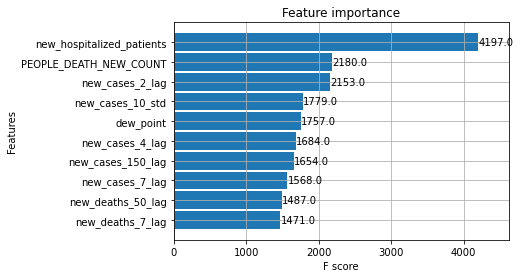

In [7]:
_ = plot_importance(reg_model, height=0.9 ,max_num_features = 10)

<AxesSubplot:xlabel='ds'>

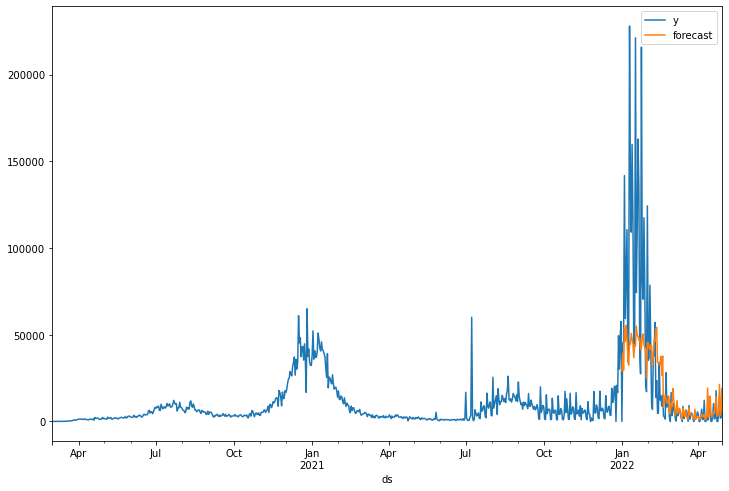

In [8]:
covid_test['forecast'] = reg_model.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast']=covid_test['forecast']

prophet_df_multi[['y', 'forecast']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

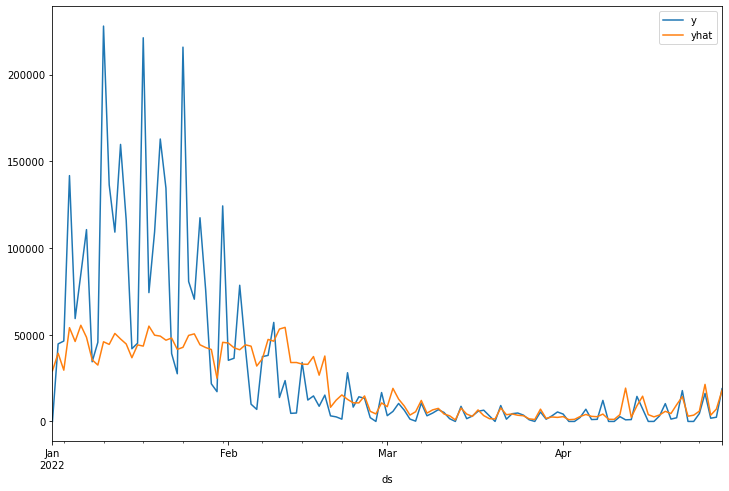

In [9]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [10]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  39808.81606243128
Test MAE:  19127.1253262047
MASE =  0.8177586495038213


In [11]:
from sklearn.model_selection import TimeSeriesSplit

tss = TimeSeriesSplit(n_splits = 5, test_size = 100, gap = 1)
covid_df = covid_df.sort_index()

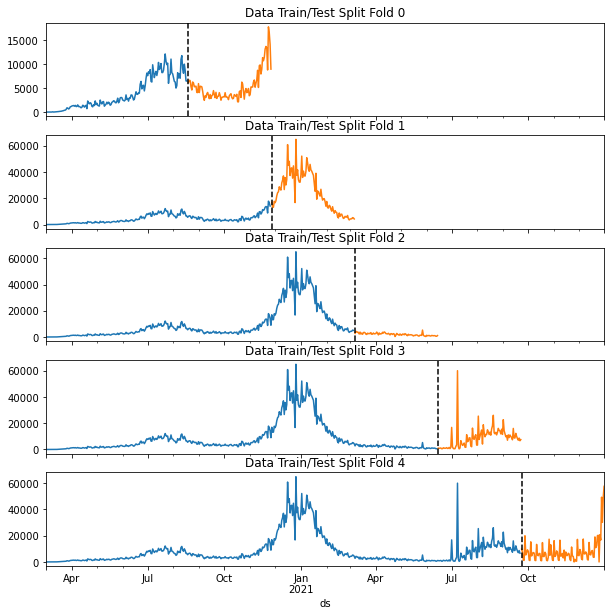

In [12]:
fig, axs = plt.subplots(5, 1, figsize=(10, 10), sharex=True)

fold = 0
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    train['y'].plot(ax=axs[fold],
                          label='Training Set',
                          title=f'Data Train/Test Split Fold {fold}')
    test['y'].plot(ax=axs[fold],
                         label='Test Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1
plt.show()

In [13]:
tss = TimeSeriesSplit(n_splits=5, test_size=100, gap=1)
covid_df = covid_df.sort_index()


fold = 0
preds = []
scores = []
for train_idx, val_idx in tss.split(covid_train):
    train = covid_df.iloc[train_idx]
    test = covid_df.iloc[val_idx]
    TARGET = 'y'

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                           n_estimators=1000,
                           early_stopping_rounds=20,
                           objective='reg:linear',
                           max_depth=3,
                           learning_rate=0.01)
    reg.fit(X_train, y_train,
            eval_set=[(X_train, y_train), (X_test, y_test)],
            verbose=100)

    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)  

[19:46:48] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:13257.57189	validation_1-rmse:58249.04519
[100]	validation_0-rmse:5929.46683	validation_1-rmse:46709.24195
[200]	validation_0-rmse:3362.28256	validation_1-rmse:41594.33764
[300]	validation_0-rmse:2460.39215	validation_1-rmse:39480.55150
[400]	validation_0-rmse:2058.99299	validation_1-rmse:38682.00286
[500]	validation_0-rmse:1841.98972	validation_1-rmse:38161.92259
[600]	validation_0-rmse:1743.98564	validation_1-rmse:37573.41551
[700]	validation_0-rmse:1653.07271	validation_1-rmse:37307.90808
[800]	validation_0-rmse:1573.93027	validation_1-rmse:37174.60654
[900]	validation_0-rmse:1501.47867	validation_1-rmse:37063.14288
[999]	validation_0-rmse:1438.58339	validation_1-rmse:37026.15642
[19:46:50] WARNING: c:\users\dev-admin\croot2\xgboost-split_1675461376218\work\src\objective\regression_obj.cu:

<AxesSubplot:xlabel='ds'>

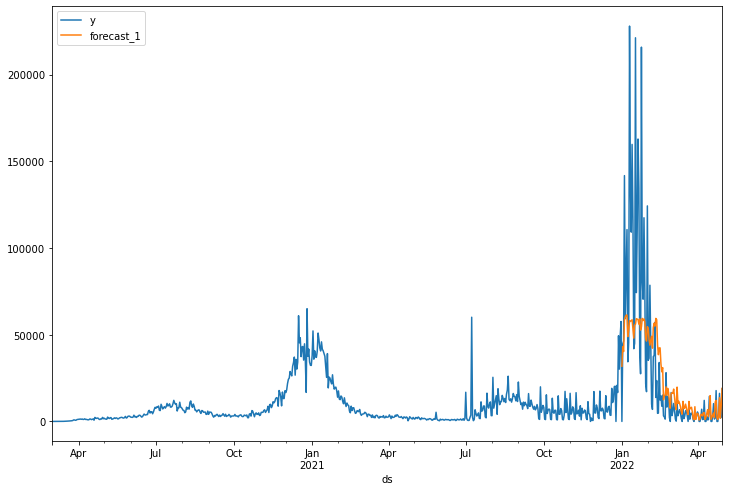

In [14]:
covid_test['forecast_1'] = reg.predict(X_test)

prophet_df_multi = pd.DataFrame(covid_df)

prophet_df_multi['forecast_1']=covid_test['forecast_1']

prophet_df_multi[['y', 'forecast_1']].plot(figsize=(12,8))

<AxesSubplot:xlabel='ds'>

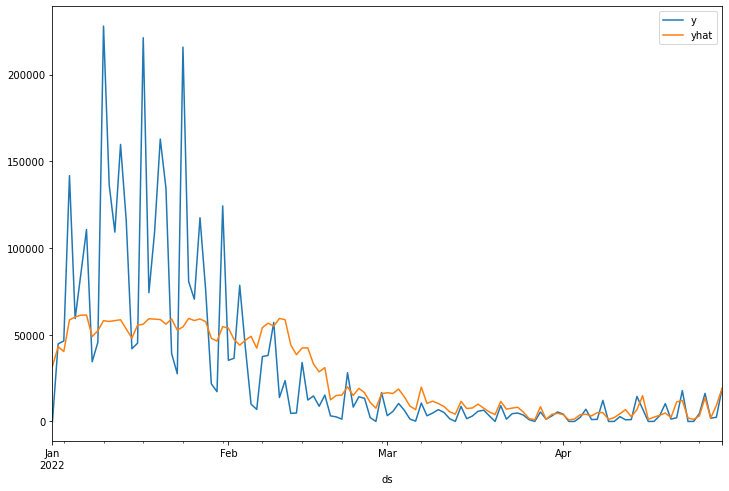

In [15]:
graph_df = pd.DataFrame(covid_test)
graph_df['yhat'] = covid_test['forecast_1'].values
graph_df[['y','yhat']].plot(figsize=(12,8))

In [16]:
model_rmse = mean_squared_error(covid_test['y'], covid_test['forecast'], squared=False)
model_mae = mean_absolute_error(covid_test['y'], covid_test['forecast'])
print('Test RMSE: ', model_rmse)
print('Test MAE: ', model_mae)
print('MASE = ', mase(covid_test['y'], covid_test['forecast']))

Test RMSE:  39808.81606243128
Test MAE:  19127.1253262047
MASE =  0.8177586495038213
